# Семинар 1
**План семинара:**
1. Получение информации об оборудовании
2. Библиотека Pytorch
  - установка (Windows/Linux(Google Colab); CPU/GPU)
  - обзор возможностей и особенностей
  - запуск простейших примеров
3. Введение в глубокое обучение
  - перцептрон (решение практических задач)

# Получение информации об оборудовании

**Windows** - GUI\
**Linux** (Google colab) - terminal

In [ ]:
# версия Linux
!cat /proc/version

Linux version 5.10.133+ (builder@b1018906abc3) (Chromium OS 12.0_pre422132_p20210405-r10 clang version 13.0.0 (/var/tmp/portage/sys-devel/llvm-12.0_pre422132_p20210405-r10/work/llvm-12.0_pre422132_p20210405/clang cd442157cff4aad209ae532cbf031abbe10bc1df), LLD 13.0.0 (/var/tmp/portage/sys-devel/llvm-12.0_pre422132_p20210405-r10/work/llvm-12.0_pre422132_p20210405/lld cd442157cff4aad209ae532cbf031abbe10bc1df)) #1 SMP Fri Aug 26 08:44:51 UTC 2022


In [ ]:
# версия дистрибутива Linux
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.6 LTS
Release:	18.04
Codename:	bionic


In [ ]:
# видеокарта
!nvidia-smi

Mon Nov 28 13:39:06 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

CUDA Version в nvidia-smi - это не ваша текущая версия CUDA, а [максимально поддерживаемая версия](https://docs.nvidia.com/cuda/cuda-toolkit-release-notes/index.html) для текущего драйвера видеокарты.

In [ ]:
# cuda compiler
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


In [ ]:
# процессор
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes

In [ ]:
# процессор
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               79
Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:            0
CPU MHz:             2199.998
BogoMIPS:            4399.99
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            56320K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_sin

In [ ]:
# оперативная память
!grep MemTotal /proc/meminfo

MemTotal:       13297228 kB


In [ ]:
# диск
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          79G   23G   56G  29% /
tmpfs            64M     0   64M   0% /dev
shm             5.7G     0  5.7G   0% /dev/shm
/dev/root       2.0G  1.1G  910M  54% /sbin/docker-init
tmpfs           6.4G   40K  6.4G   1% /var/colab
/dev/sda1        75G   41G   35G  55% /opt/bin/.nvidia
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [ ]:
!du -h | sort -h

8.0K	./.config/configurations
72K	./.config/logs/2022.11.22
76K	./.config/logs
108K	./.config
55M	.
55M	./sample_data


In [ ]:
# права в Google Colab
!whoami

root


# Библиотека Pytorch

## Установка

Ссылки для установки под ваше оборудование можно найти [тут](https://pytorch.org/get-started/locally/).

In [ ]:
import torch

In [ ]:
torch.cuda.is_available()

True

In [ ]:
!python -m pip list | grep torch

torch                         1.12.1+cu113
torchaudio                    0.12.1+cu113
torchsummary                  1.5.1
torchtext                     0.13.1
torchvision                   0.13.1+cu113


## Обзор возможностей и особенностей

## Тензоры

In [ ]:
a = torch.Tensor([1,2,3])
a

tensor([1., 2., 3.])

In [ ]:
b = torch.tensor([1,2,3])
b

tensor([1, 2, 3])

Типы данных

In [ ]:
a.dtype, b.dtype

(torch.float32, torch.int64)

Перевод данных в другой тип

In [ ]:
c = b.float()

print(c, c.dtype)

print(c.int(), c.int().dtype)
print(c.long(), c.long().dtype)
print(c.double(), c.double().dtype)

tensor([1., 2., 3.]) torch.float32
tensor([1, 2, 3], dtype=torch.int32) torch.int32
tensor([1, 2, 3]) torch.int64
tensor([1., 2., 3.], dtype=torch.float64) torch.float64


In [ ]:
x = torch.rand(2, 3)
print(x) 
print(x.device)
print(x.dtype)

tensor([[0.4929, 0.1061, 0.3542],
        [0.0997, 0.9368, 0.0315]])
cpu
torch.float32


## Воспроизводимость результатов

In [ ]:
# для воспроизводимости результатов
# не изменяйте и не удаляйте этот код
from numpy.random import seed
import random

random.seed(0)
seed(0)
torch.manual_seed(0)

In [ ]:
!pip install pytorch-lightning -qqq

     |████████████████████████████████| 798 kB 26.7 MB/s 
     |████████████████████████████████| 529 kB 66.3 MB/s 
     |████████████████████████████████| 125 kB 56.8 MB/s 
     |████████████████████████████████| 87 kB 7.2 MB/s 


In [ ]:
import pytorch_lightning as pl

In [ ]:
from pytorch_lightning import seed_everything

Function that sets seed for pseudo-random number generators in: pytorch, numpy, python.random

In [ ]:
seed_everything(0, workers=True)                

INFO:lightning_lite.utilities.seed:Global seed set to 0


0

Подробнее можно прочитать [тут](https://pytorch.org/docs/stable/notes/randomness.html).

## CUDA

In [ ]:
# проверка доступности видеокарты, выбор устройства CPU или GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

Данные нужно вручную переносить в видеопамять -- метод cuda. Перенос в оперативную память -- cpu. Альтернатива -- использование метода `.to(device)`. По умолчанию данные на cpu.

In [ ]:
d = c.to(device)

In [ ]:
import torch

In [ ]:
torch.cuda.get_device_properties(0)

_CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)

In [ ]:
!nvidia-smi

Mon Nov 28 13:57:19 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    27W /  70W |    612MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
def allocate_empty_tensor(dim_size):
  a=torch.zeros(4096,dim_size,dtype=torch.float32,device='cuda')

In [ ]:
allocate_empty_tensor(2048)

In [ ]:
torch.cuda.memory_allocated()

512

In [ ]:
torch.cuda.memory_reserved()

1908408320

In [ ]:
!nvidia-smi

Mon Nov 28 13:59:56 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P0    29W /  70W |   2430MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
allocate_empty_tensor(2048 * 100)

In [ ]:
torch.cuda.memory_reserved()

5263851520

In [ ]:
!nvidia-smi

Mon Nov 28 14:01:41 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    30W /  70W |   5630MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
torch.cuda.empty_cache()
torch.cuda.memory_reserved()

2097152

In [ ]:
!nvidia-smi

Mon Nov 28 14:02:26 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    39W /  70W |    612MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
allocate_empty_tensor(600000)
torch.cuda.memory_reserved()

9833545728

## Точность

In [ ]:
torch.manual_seed(1337)
x = torch.randn(5000, 5000)

def matrix_power(x):
  y = x @ x @ x @ x @ x @ x
  return (y).sum().item()

print(matrix_power(x))
print(matrix_power(x.cuda()))

27654770130944.0
27654807879680.0


In [ ]:
import numpy as np

In [ ]:
print(matrix_power(x.numpy()))
np.linalg.matrix_power(x.numpy(),6).sum()

27654791102464.0


27654774000000.0

Takeaway: numerical precision of floating point computations can vary between libraries, environments and devices, and from the user side, it is often hard to resolve this issue altogether. Usually, this happens due to a different summation order in code or due to inherent nondeterminism of hardware.

However, note that the relative error is small enough, which makes such blatant discrepancies less of a problem in regular deep learning code.


## Нейроны и линейные слои

![alt text](https://drive.google.com/uc?export=view&id=1k96ch-5lAGYrfBk4xgoty93xy-GP2bhr)


![alt text](https://drive.google.com/uc?export=view&id=1ORawq1pZJ7a2z7vUD2PPyLELkOHoAB51)

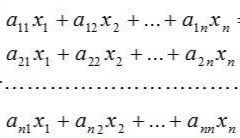

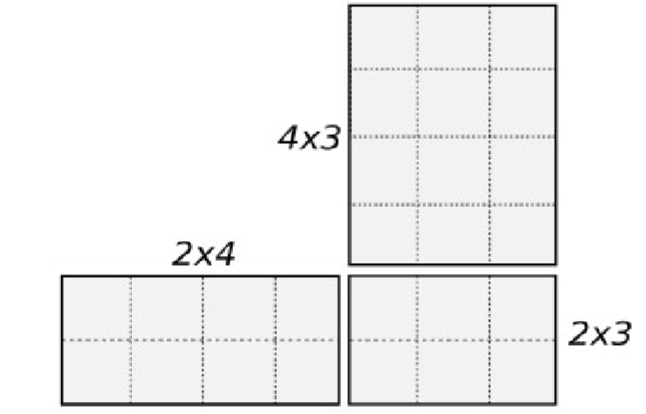

In [ ]:
batch_size = 2 # Количество покупателей
w = 4          # Количество существующих товаров
m = 3          # Количество существующих магазинов

# Матрица покупателей
X = torch.rand(batch_size, w)

# Матрица цен в магазине
W = torch.rand(m,w)

# Цена за топливо
b = torch.rand(m)

print(X.shape, W.shape, b.shape)

print(X)

answer = X @ W.T + b
answer.shape

torch.Size([2, 4]) torch.Size([3, 4]) torch.Size([3])
tensor([[0.5997, 0.7686, 0.8438, 0.6866],
        [0.9745, 0.5593, 0.4227, 0.4468]])


torch.Size([2, 3])

In [ ]:
linear = torch.nn.Linear(4, 3)
out = linear(X)
out.shape

torch.Size([2, 3])

In [ ]:
linear.weight.data.shape

torch.Size([3, 4])

In [ ]:
linear.bias

Parameter containing:
tensor([ 0.4250,  0.1366, -0.1779], requires_grad=True)

### Встроенные слои

In [ ]:
from torch import nn # модуль с базовыми слоями
import torch.nn.functional as F # модуль с базовыми функциями

In [ ]:
dir(nn)[:10]

['AdaptiveAvgPool1d',
 'AdaptiveAvgPool2d',
 'AdaptiveAvgPool3d',
 'AdaptiveLogSoftmaxWithLoss',
 'AdaptiveMaxPool1d',
 'AdaptiveMaxPool2d',
 'AdaptiveMaxPool3d',
 'AlphaDropout',
 'AvgPool1d',
 'AvgPool2d']

Два способа создания нейросети:
  1. на основе готового класса `nn.Sequential` объединяющего отдельные слои
    - данные передаются по сети в том порядке, в каком объявлены слои
    - функции активации задаются как отдельные слои
  2. свой класс для нейросети, на основе `nn.Module`
    - порядок передачи данных можно менять во время обучения, переопределив forward - динамический граф вычислений

Первый способ стоит использовать только как контейнер для ряда слоев. Неросеть нужно наследовать от `nn.Module`.


In [ ]:
net_seq = nn.Sequential(
    nn.Linear(in_features=3, out_features=5),
    nn.Sigmoid(),
    nn.Linear(in_features=5, out_features=2),                                                            
)
net_seq.to(device)
net_seq

Sequential(
  (0): Linear(in_features=3, out_features=5, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=5, out_features=2, bias=True)
)

In [ ]:
net_seq(X.to(device))

tensor([[-0.5553, -0.6644],
        [-0.5321, -0.6666]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=3, out_features=5)
        self.fc2 = nn.Linear(in_features=5, out_features=2)

    def forward(self, x):
        x = self.fc1(x)
        return F.sigmoid(self.fc2(x))

In [ ]:
net_model = Model()
net_model.to(device)
net_model

Model(
  (fc1): Linear(in_features=3, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=2, bias=True)
)

### **Задача 1**. Посчитайте количество обучаемых параметров в сети net_seq и net_model.

In [ ]:
params_cnt = 0

for param in net_seq.parameters():
    if len(param.shape) == 1:
        params_cnt += param.shape[0]
    elif len(param.shape) == 2:
        params_cnt += param.shape[0] * param.shape[1]
    print(param)

Parameter containing:
tensor([[-0.5071, -0.3560, -0.1474],
        [-0.0501,  0.5563, -0.1077],
        [ 0.3447, -0.0061, -0.1764],
        [-0.1405,  0.3691, -0.3770],
        [ 0.1229,  0.5718,  0.4980]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.3664, -0.5229, -0.1720,  0.4015, -0.0375], device='cuda:0',
       requires_grad=True)
Parameter containing:
tensor([[ 0.2951, -0.2478,  0.0943,  0.1665,  0.0701],
        [-0.1955,  0.1117,  0.3253,  0.4190,  0.3716]], device='cuda:0',
       requires_grad=True)
Parameter containing:
tensor([0.0961, 0.3931], device='cuda:0', requires_grad=True)


In [ ]:
params_cnt

32

In [ ]:
params_cnt = 0

for param in net_model.parameters():
    if len(param.shape) == 1:
        params_cnt += param.shape[0]
    elif len(param.shape) == 2:
        params_cnt += param.shape[0] * param.shape[1]

In [ ]:
params_cnt

32

# Введение в глубокое обучение

In [ ]:
import numpy as np
import torch

![alt text](https://drive.google.com/uc?export=view&id=19I2SrQHTO4njMHwCYh8fcaX-qOcKKy2A)

## **Задача 2**. Cделать нейрон, соответствующий оператору НЕ.

In [ ]:
class Neuron(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.fc = nn.Linear(1, 1)

  def forward(self, x):
    return torch.heaviside(self.fc(x), torch.tensor([0.0]))

In [ ]:
neuron = Neuron()
neuron.fc.weight, neuron.fc.bias

(Parameter containing:
 tensor([[0.9640]], requires_grad=True), Parameter containing:
 tensor([-0.7349], requires_grad=True))

In [ ]:
neuron.fc.weight.data = torch.tensor([[-1.0]])
neuron.fc.bias.data = torch.tensor([0.5])

In [ ]:
x = torch.Tensor([0.0])
neuron(x)

tensor([1.], grad_fn=<NotImplemented>)

In [ ]:
x = torch.Tensor([1.0])
neuron(x)

tensor([0.], grad_fn=<NotImplemented>)

## **Задача 3**. Cделать нейрон, соответствующий оператору И.

In [ ]:
class Neuron(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.fc = torch.nn.Linear(2, 1)

  def forward(self, x):
    return torch.heaviside(self.fc(x), torch.tensor([0.0]))

In [ ]:
neuron = Neuron()
neuron.fc.weight, neuron.fc.bias

(Parameter containing:
 tensor([[0.5219, 0.6366]], requires_grad=True), Parameter containing:
 tensor([0.0608], requires_grad=True))

In [ ]:
neuron.fc.weight.data = torch.tensor([[0.5, 0.5]])
neuron.fc.bias.data = torch.tensor([-0.5])

In [ ]:
x = torch.tensor([0.0, 0.0])
neuron(x)

tensor([0.], grad_fn=<NotImplemented>)

In [ ]:
x = torch.tensor([1.0, 0.0])
neuron(x)

tensor([0.], grad_fn=<NotImplemented>)

In [ ]:
x = torch.tensor([0.0, 1.0])
neuron(x)

tensor([0.], grad_fn=<NotImplemented>)

In [ ]:
x = torch.tensor([1.0, 1.0])
neuron(x)

tensor([1.], grad_fn=<NotImplemented>)

## **Задача 4**. Cделать нейрон, соответствующий оператору ИЛИ.

In [ ]:
neuron.fc.weight.data = torch.tensor([[1.0, 1.0]])
neuron.fc.bias.data = torch.tensor([0.0])

In [ ]:
x = torch.tensor([0.0, 0.0])
neuron(x)

tensor([0.], grad_fn=<NotImplemented>)

In [ ]:
x = torch.tensor([1.0, 0.0])
neuron(x)

tensor([1.], grad_fn=<NotImplemented>)

In [ ]:
x = torch.tensor([0.0, 1.0])
neuron(x)

tensor([1.], grad_fn=<NotImplemented>)

In [ ]:
x = torch.tensor([1.0, 1.0])
neuron(x)

tensor([1.], grad_fn=<NotImplemented>)

## **Задача 5**. Cделать нейрон, соответствующий оператору XOR.

Это невозможно

In [ ]:
neuron.fc.weight.data = torch.tensor([[0.0, 0.0]])
neuron.fc.bias.data = torch.tensor([0.0])

In [ ]:
x = torch.tensor([0.0, 0.0])
neuron(x)

## **Вопрос 1**. Какие нейронные сети могут иметь только линейную разделяющую поверхность?

Однослойные нейронные сети

## **Вопрос 2**. Имеет ли смысл соединять полносвязанные нейроны (нейроны, которые принимают на вход все выходы предыдущего слоя) с линейной функцией активации в многослойную нейронную сеть?

Нет, так как перемножение многих матриц эквивалентно перемножению двух.

# Домашнее задание

In [ ]:
import torch

Дедлайн домашнего задания - текущее воскресенье 23:59. 

**Домашнее задание 0:** Создайте репозиторий на Github. Вся дальнейшая домашка загружается туда. Чуть позже в телеграм чате будет выложена форма для сдачи.

**Домашнее задание 1:** реализуйте XOR с помощью 3 нейронов. Запишите ответ в виде выражения, состоящего из объектов neuron() – моделей нейрона с пороговой функцией активации, внутри скобок может быть что угодно. Входы верхнего уровня называются x1 и x2. Пример фрагмента записи: neuron(1*x1 + 5*x2 - 0.1) + neuron(x1) (ответ будет выглядеть чуть сложнее, но других символов вроде && не потребуется).

Ответ: ```neuron(neuron(x1 + x2) + neuron(2 - x1 - x2) - 1)```

In [ ]:
class Neuron(torch.nn.Module):
  def __init__(self):
    super().__init__()

  def forward(self, x):
    return torch.heaviside(torch.Tensor([x]), torch.tensor([0.0]))

In [ ]:
neuron = Neuron()

In [ ]:
x1 = 0
x2 = 0
neuron(neuron(x1 + x2) + neuron(2 - x1 - x2) - 1)

tensor([0.])

In [ ]:
x1 = 1
x2 = 0
neuron(neuron(x1 + x2) + neuron(2 - x1 - x2) - 1)

tensor([1.])

In [ ]:
x1 = 0
x2 = 1
neuron(neuron(x1 + x2) + neuron(2 - x1 - x2) - 1)

tensor([1.])

In [ ]:
x1 = 1
x2 = 1
neuron(neuron(x1 + x2) + neuron(2 - x1 - x2) - 1)

tensor([0.])

**Домашнее задание 2:** нарисуйте backward граф для выражения `a*b+c*d`. [Теория и пример оформления](https://www.youtube.com/watch?v=MswxJw-8PvE). Сравните полученные теоретические значения с аттрибутами grad у исходных тензоров.

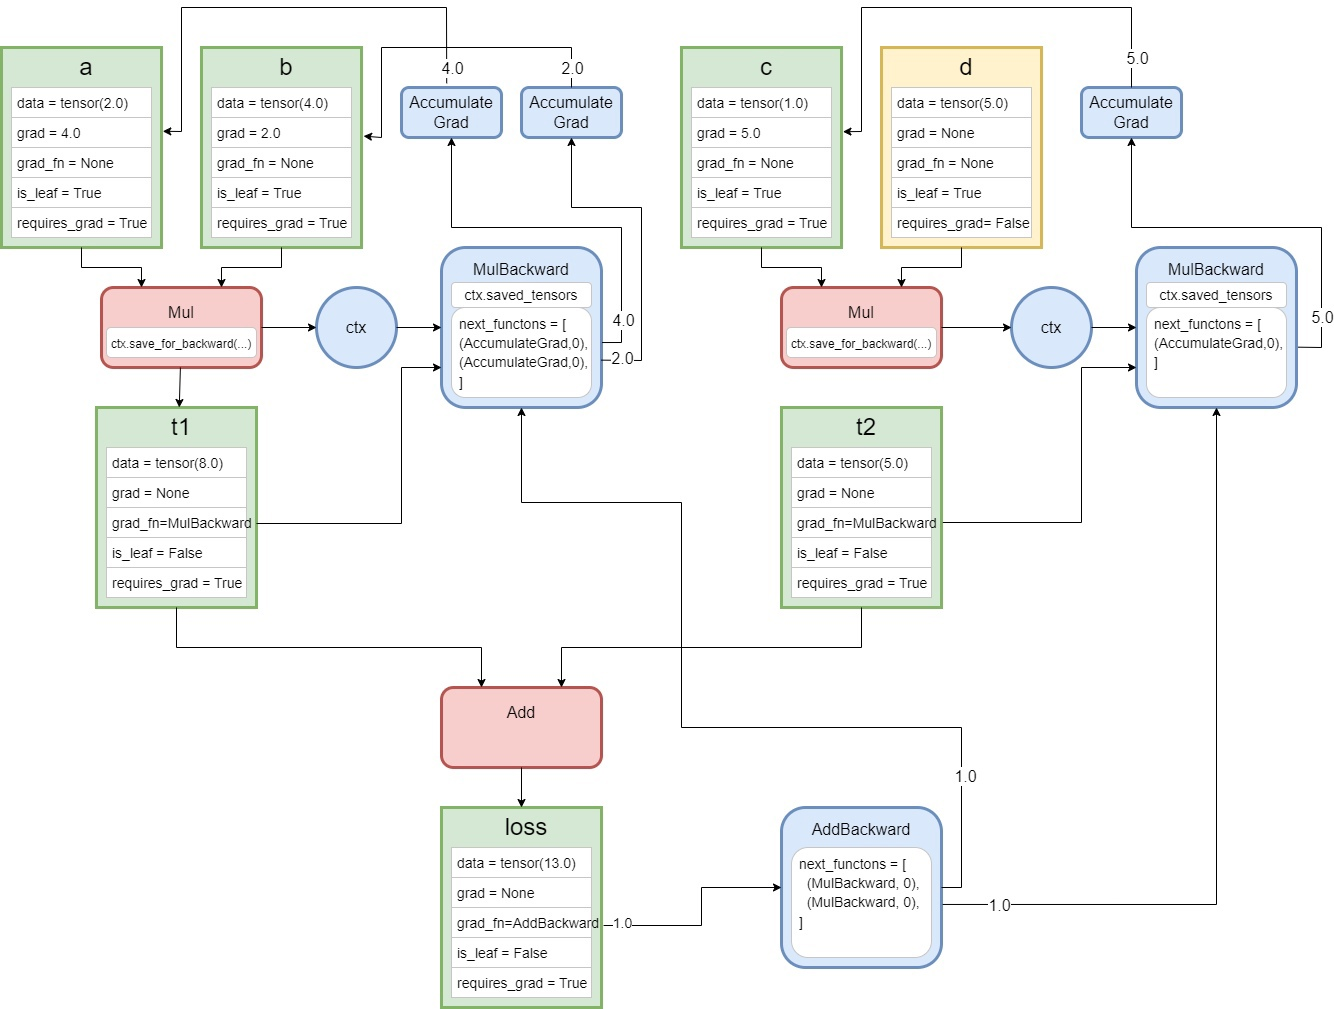

In [ ]:
a = torch.tensor([2.0], requires_grad=True)
b = torch.tensor([4.0], requires_grad=True)
c = torch.tensor([1.0], requires_grad=True)
d = torch.tensor([5.0], requires_grad=False)

In [ ]:
print(a.grad)

None


In [ ]:
loss = a*b + c*d
loss.backward()

In [ ]:
print(a.grad)
print(b.grad)
print(c.grad)
print(d.grad)

tensor([4.])
tensor([2.])
tensor([5.])
None


**Домашнее задание 3:** Поэксперементируйте с размером тензоров, которые влезут на видеоркарту в Colab. Найдите максимальный размер тензора для типа данных float32, float64, float16, int32, int64. На сколько они отличаются.

In [ ]:
tensors = []
iters_cnt = 0
while True:
    try:
        tensors.append(
            torch.tensor([1.0] * int(1e8), dtype=torch.float32, device='cuda')
        )
        iters_cnt += 1
    except RuntimeError:
        print(iters_cnt)
        break
del tensors
torch.cuda.empty_cache()
print('Max tensor size with dtype float32: ', iters_cnt * 1e8)

37
Max tensor size with dtype float32:  3700000000.0


In [ ]:
tensors = []
iters_cnt = 0
while True:
    try:
        tensors.append(
            torch.tensor([1.0] * int(1e8), dtype=torch.float64, device='cuda')
        )
        iters_cnt += 1
    except RuntimeError:
        print(iters_cnt)
        break
del tensors
torch.cuda.empty_cache()
print('Max tensor size with dtype float64: ', iters_cnt * 1e8)

18
Max tensor size with dtype float64:  1800000000.0


In [ ]:
tensors = []
iters_cnt = 0
while True:
    try:
        tensors.append(
            torch.tensor([1.0] * int(1e8), dtype=torch.float16, device='cuda')
        )
        iters_cnt += 1
    except RuntimeError:
        print(iters_cnt)
        break
del tensors
torch.cuda.empty_cache()
print('Max tensor size with dtype float16: ', iters_cnt * 1e8)

75
Max tensor size with dtype float16:  7500000000.0


In [ ]:
tensors = []
iters_cnt = 0
while True:
    try:
        tensors.append(
            torch.tensor([1] * int(1e8), dtype=torch.int32, device='cuda')
        )
        iters_cnt += 1
    except RuntimeError:
        print(iters_cnt)
        break
del tensors
torch.cuda.empty_cache()
print('Max tensor size with dtype int32: ', iters_cnt * 1e8)

37
Max tensor size with dtype int32:  3700000000.0


In [ ]:
tensors = []
iters_cnt = 0
while True:
    try:
        tensors.append(
            torch.tensor([1] * int(1e8), dtype=torch.int64, device='cuda')
        )
        iters_cnt += 1
    except RuntimeError:
        print(iters_cnt)
        break
del tensors
torch.cuda.empty_cache()
print('Max tensor size with dtype int64: ', iters_cnt * 1e8)

18
Max tensor size with dtype int64:  1800000000.0


**Домашнее задание 4:** Напишите хороший пример неэффективного кода для занятия памяти видеокарты, который вызовет ошибку out of memory

In [ ]:
import torch
from sklearn.metrics import accuracy_score
import random
from tqdm.auto import tqdm

In [ ]:
model = torch.nn.Linear(64*64*3, 10000, device='cuda')

In [ ]:
iters_cnt = int(1e6)

In [ ]:
y_true = []
y_pred = []

for i in tqdm(range(iters_cnt)):
    x, y = torch.rand(64*64*3), torch.randint(0, 10000, (1,))
    x_gpu = x.to('cuda')

    output = model(x_gpu)

    y_true.append(y)
    y_pred.append(output)

print(accuracy_score(y_true, y_pred))

  0%|          | 0/1000000 [00:00<?, ?it/s]

RuntimeError: ignored

**Домашнее задание 5:** Используя один линейный слой `nn.Linear` и один входной тензор `x` подберите подберите размерности так, чтобы занимать всю видеопамять.
Попробуйте применить линейный слой к тензору `x`. Что произойдет? Кратко опишите ваши эксперименты. Что вы поняли?

In [ ]:
linear = torch.nn.Linear(int(1e6), int(1.9e3), device='cuda')

In [ ]:
x = torch.rand((int(1.9e3), int(1e6)), device='cuda')

In [ ]:
linear(x)

RuntimeError: ignored

PyTorch сохраняет тензоры, необходимые для вычисления градиента при обратном проходе. Но так как веса слоя и входные данные занимают почти всю память, для новых тензоров нет свободного места.

# Рекомендуемые ссылки

- [Нейронные сети и компьютерное зрение, Samsung AI Center, часть 1](https://stepik.org/course/50352/syllabus)
- [Cимулятор](https://playground.tensorflow.org/) нейронов и нейронных сетей